In [3]:
import zipfile
zip_ref= zipfile.ZipFile('/content/drive/MyDrive/Data_Science/Computer Vision/Test-20230509T050104Z-001.zip', 'r')
zip_ref.extractall('/content/drive/MyDrive/Data_Science/Computer Vision')
zip_ref.close()

In [4]:
import zipfile
zip_ref= zipfile.ZipFile('/content/drive/MyDrive/Data_Science/Computer Vision/Train-20230509T050038Z-001.zip', 'r')
zip_ref.extractall('/content/drive/MyDrive/Data_Science/Computer Vision')
zip_ref.close()

In [5]:
import os
os.getcwd()

'/content'

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
from keras.layers import Dense, Input, Lambda, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.models import Sequential
from keras.applications import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [7]:
Image_size = [224, 224]
train_path = '/content/drive/MyDrive/Data_Science/Computer Vision/Train'
test_path = '/content/drive/MyDrive/Data_Science/Computer Vision/Test'

In [8]:
vgg = VGG16(input_shape=Image_size + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
  layer.trainable = False

58889256/58889256 [==============================] - 3s 0us/step


In [9]:
folders = glob('/content/drive/MyDrive/Data_Science/Computer Vision/Train/*')
folders

['/content/drive/MyDrive/Data_Science/Computer Vision/Train/peter-dinklage',
 '/content/drive/MyDrive/Data_Science/Computer Vision/Train/kit-harington',
 '/content/drive/MyDrive/Data_Science/Computer Vision/Train/emilia-clarke',
 '/content/drive/MyDrive/Data_Science/Computer Vision/Train/nikolaj-coster-waldau',
 '/content/drive/MyDrive/Data_Science/Computer Vision/Train/justin']

In [12]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics =['accuracy'])

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
training_dataset = train_datagen.flow_from_directory('/content/drive/MyDrive/Data_Science/Computer Vision/Train',
                                                     target_size=(224,224), batch_size=32,
                                                     class_mode='categorical')

test_dataset = test_datagen.flow_from_directory('/content/drive/MyDrive/Data_Science/Computer Vision/Test',
                                                target_size=(224,224), batch_size=32,
                                                class_mode ='categorical')

Found 32 images belonging to 5 classes.
Found 5 images belonging to 5 classes.


In [16]:
final_model = model.fit_generator(training_dataset, validation_data=test_dataset, epochs=10, 
                                  steps_per_epoch= len(training_dataset),validation_steps=len(test_dataset) )

<ipython-input-16-4ba28675e409>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  final_model = model.fit_generator(training_dataset, validation_data=test_dataset, epochs=10,


Epoch 1/10
1/1 [==============================] - 28s 28s/step - loss: 1.8350 - accuracy: 0.2500 - val_loss: 2.6123 - val_accuracy: 0.4000
Epoch 2/10
1/1 [==============================] - 29s 29s/step - loss: 2.5100 - accuracy: 0.4375 - val_loss: 1.5790 - val_accuracy: 0.4000
Epoch 3/10
1/1 [==============================] - 25s 25s/step - loss: 1.5469 - accuracy: 0.5938 - val_loss: 0.6774 - val_accuracy: 0.8000
Epoch 4/10
1/1 [==============================] - 25s 25s/step - loss: 0.7533 - accuracy: 0.5938 - val_loss: 0.4415 - val_accuracy: 0.8000
Epoch 5/10
1/1 [==============================] - 30s 30s/step - loss: 0.7064 - accuracy: 0.7500 - val_loss: 0.2921 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 27s 27s/step - loss: 0.5909 - accuracy: 0.7500 - val_loss: 0.1581 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 25s 25s/step - loss: 0.3241 - accuracy: 0.9375 - val_loss: 0.0966 - val_accuracy: 1.0000
Epoch 8/10
1/1 [===========

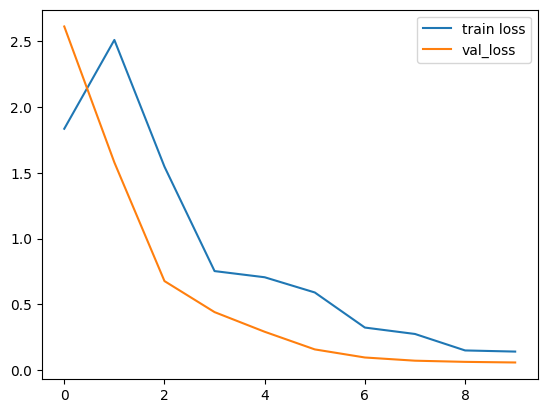

In [17]:
plt.plot(final_model.history['loss'], label='train loss')
plt.plot(final_model.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

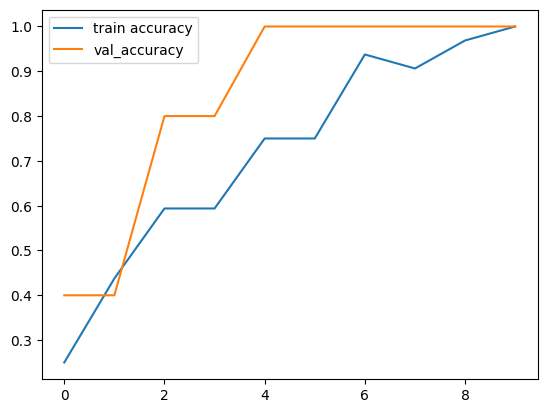

In [18]:
plt.plot(final_model.history['accuracy'], label='train accuracy')
plt.plot(final_model.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [19]:
# Save the model for computer vision 
from keras.models import load_model
model.save("my_own_model.h5")